In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

universal_reviews=pd.read_csv('/content/gdrive/My Drive/universal_studio_branches.csv')

universal_reviews

,reviewer,rating,written_date,title,review_text,branch
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida
1,Jon,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida
2,Nerdy P,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida
3,ran101278,4.0,"May 29, 2021",My opinion,When a person tries the test seat for the ride...,Universal Studios Florida
4,tammies20132015,5.0,"May 28, 2021",The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida
...,...,...,...,...,...,...
50899,vinz20,4.0,"March 29, 2010",I'll Be Back Only If ...,This is my first visit to a Universal Studio t...,Universal Studios Singapore
50900,betty l,4.0,"March 29, 2010",Universal Studios Singapore Experience,We finally visited Singapore's very first them...,Universal Studios Singapore
50901,spoonos65,4.0,"March 28, 2010",Impressive but not quite finished!,We visited during the first week of its 'soft ...,Universal Studios Singapore
50902,HeatSeekerWrexham_UK,4.0,"March 22, 2010",Small but beautifully marked,We visited on the 3rd day of the 'soft' openin...,Universal Studios Singapore


In [ ]:
universal_reviews['label'] = universal_reviews.rating.map({1:0, 2:0, 4:1, 5:1})

In [ ]:
universal_reviews['rating'] = universal_reviews['rating'].astype(int)
review = universal_reviews.drop(['reviewer', 'title'], axis = 1)
review.head()

,rating,written_date,review_text,branch,label
0,2,"May 30, 2021",We went to Universal over Memorial Day weekend...,Universal Studios Florida,0.0
1,1,"May 30, 2021",The food service is horrible. I’m not reviewin...,Universal Studios Florida,0.0
2,2,"May 30, 2021",I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida,0.0
3,4,"May 29, 2021",When a person tries the test seat for the ride...,Universal Studios Florida,1.0
4,5,"May 28, 2021","Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida,1.0


In [ ]:
reviews = review.dropna()
reviews

,rating,written_date,review_text,branch,label
0,2,"May 30, 2021",We went to Universal over Memorial Day weekend...,Universal Studios Florida,0.0
1,1,"May 30, 2021",The food service is horrible. I’m not reviewin...,Universal Studios Florida,0.0
2,2,"May 30, 2021",I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida,0.0
3,4,"May 29, 2021",When a person tries the test seat for the ride...,Universal Studios Florida,1.0
4,5,"May 28, 2021","Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida,1.0
...,...,...,...,...,...
50899,4,"March 29, 2010",This is my first visit to a Universal Studio t...,Universal Studios Singapore,1.0
50900,4,"March 29, 2010",We finally visited Singapore's very first them...,Universal Studios Singapore,1.0
50901,4,"March 28, 2010",We visited during the first week of its 'soft ...,Universal Studios Singapore,1.0
50902,4,"March 22, 2010",We visited on the 3rd day of the 'soft' openin...,Universal Studios Singapore,1.0


In [ ]:
# Florida datasets
florida_reviews = reviews.loc[(reviews['branch'] == 'Universal Studios Florida')]
florida_reviews_fullcovid_dataset = florida_reviews.head(6500)
florida_reviews_postcovid = florida_reviews_fullcovid_dataset.head(500)
florida_reviews_precovid = florida_reviews_fullcovid_dataset.tail(6000)
florida_reviews_postcovid

,rating,written_date,review_text,branch,label
0,2,"May 30, 2021",We went to Universal over Memorial Day weekend...,Universal Studios Florida,0.0
1,1,"May 30, 2021",The food service is horrible. I’m not reviewin...,Universal Studios Florida,0.0
2,2,"May 30, 2021",I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida,0.0
3,4,"May 29, 2021",When a person tries the test seat for the ride...,Universal Studios Florida,1.0
4,5,"May 28, 2021","Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida,1.0
...,...,...,...,...,...
546,1,"March 12, 2020",Worst experience of my life. Rude staff. Long ...,Universal Studios Florida,0.0
547,5,"March 11, 2020",We love Universal. Have visited several times ...,Universal Studios Florida,1.0
548,5,"March 11, 2020",WOW! What an amazing theme park. I was here wi...,Universal Studios Florida,1.0
549,5,"March 11, 2020",Visited Universal Orlando park for 3 days last...,Universal Studios Florida,1.0


In [ ]:
# Singapore datasets
singapore_reviews = reviews.loc[(reviews['branch'] == 'Universal Studios Singapore')]
singapore_reviews_fullcovid_dataset = singapore_reviews.head(2900)
singapore_reviews_postcovid = singapore_reviews_fullcovid_dataset.head(113)
singapore_reviews_precovid = singapore_reviews_fullcovid_dataset.tail(2887)
singapore_reviews_fullcovid_dataset

,rating,written_date,review_text,branch,label
35150,5,"May 26, 2021",This place is just awesome. All the rides were...,Universal Studios Singapore,1.0
35151,4,"May 23, 2021",Excellent place when you plan on going vacatio...,Universal Studios Singapore,1.0
35152,5,"May 18, 2021",Universal Studios Singapore opened in 2010. It...,Universal Studios Singapore,1.0
35153,4,"May 13, 2021",Overall experience is good but queue still pre...,Universal Studios Singapore,1.0
35154,5,"May 8, 2021","Good place for family experience,& easy acces ...",Universal Studios Singapore,1.0
...,...,...,...,...,...
38461,5,"January 14, 2018",One day here is NOT ENOUGH. I am a thrill seek...,Universal Studios Singapore,1.0
38462,4,"January 14, 2018","My wife and I visited on 9 January 2018, its s...",Universal Studios Singapore,1.0
38463,5,"January 13, 2018",You must shed your fixations about realty as s...,Universal Studios Singapore,1.0
38464,5,"January 13, 2018",Universal Studios Singapore is a must visit fo...,Universal Studios Singapore,1.0


In [ ]:
# Japan datasets
japan_reviews = reviews.loc[(reviews['branch'] == 'Universal Studios Japan')]
japan_reviews_fullcovid_dataset = japan_reviews.head(1013)
japan_reviews_postcovid = japan_reviews_fullcovid_dataset.head(20)
japan_reviews_precovid = japan_reviews_fullcovid_dataset.tail(993)
japan_reviews_fullcovid_dataset

,rating,written_date,review_text,branch,label
30621,5,"May 27, 2021",日本是一個藝術的國家之一，東京到大阪建築文物帶出了日本的風格寺廟方面較為熱門重點壯觀美麗外表...,Universal Studios Japan,1.0
30622,1,"April 5, 2021",too expensive and nothing special。i had to thr...,Universal Studios Japan,0.0
30623,5,"February 21, 2021",Love USJ! There's something they do different ...,Universal Studios Japan,1.0
30624,5,"December 7, 2020",We went to USJ without purchasing any tickets ...,Universal Studios Japan,1.0
30625,4,"November 18, 2020",I buy the annual pass each year and I wonder w...,Universal Studios Japan,1.0
...,...,...,...,...,...
31730,5,"January 15, 2018",We arrived early and got in about 15 minutes b...,Universal Studios Japan,1.0
31731,5,"January 15, 2018",Universal studios amazing.. it is a must visit...,Universal Studios Japan,1.0
31732,5,"January 14, 2018",Me & my friend had a great time here. We took ...,Universal Studios Japan,1.0
31733,4,"January 13, 2018",We visited USJ during the holidays (after Chri...,Universal Studios Japan,1.0


In [ ]:
count=singapore_reviews_postcovid['label'].value_counts()
print (count)


1.0    82
0.0    31
Name: label, dtype: int64


In [ ]:
random_sample_florida_reviews_precovid=florida_reviews_precovid.sample(300)
random_sample_florida_reviews_precovid

,rating,written_date,review_text,branch,label
6751,1,"March 5, 2018",From the first encounter with the parking crew...,Universal Studios Florida,0.0
4624,1,"August 30, 2018",I've just returned from a 3 day trip to Univer...,Universal Studios Florida,0.0
906,2,"December 30, 2019",If you like simulation 3D/4d rides then this p...,Universal Studios Florida,0.0
3110,5,"February 12, 2019",Had a great time visiting universals adventure...,Universal Studios Florida,1.0
5715,5,"June 14, 2018","we love this place its amazing, we had fast pa...",Universal Studios Florida,1.0
...,...,...,...,...,...
3413,5,"January 6, 2019",I want to start the review simply stating that...,Universal Studios Florida,1.0
4137,1,"October 14, 2018",Disgraceful!!! Money grabbing! They Actually ...,Universal Studios Florida,0.0
5246,5,"July 18, 2018","We enjoyed all the rides like Transformers, Si...",Universal Studios Florida,1.0
5081,4,"July 31, 2018","hi, Me and my partner went to universal and h...",Universal Studios Florida,1.0


In [ ]:
#split the model into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(random_sample_florida_reviews_precovid['review_text'],
                                                    random_sample_florida_reviews_precovid['label'],
                                                    random_state=0,
                                                    test_size=0.25 #assign 25% to a test set.
                                                    )

print('Number of rows in the total set: {}'.format(random_sample_florida_reviews_precovid.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

print (1250/5000)

Number of rows in the total set: 300
Number of rows in the training set: 225
Number of rows in the test set: 75
0.25


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#generate CountVectorizer object.
tfidf_vector = TfidfVectorizer(
lowercase=True,
stop_words='english',
ngram_range=(1, 2),             #The lower and upper boundary of the range of n-values for different n-grams to be extracted.
max_df=0.3,                     #used for removing terms that appear too frequently
min_df=0.05                      #used for removing terms that appear too infrequently.
)

In [ ]:
# Fit the training data and then return the matrix
training_data = tfidf_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = tfidf_vector.transform(X_test)


print ("Shape of training set",training_data.shape)

print ("Shape of testing set",testing_data.shape)

Shape of training set (225, 179)
Shape of testing set (75, 179)


In [ ]:
vocab_dict=tfidf_vector.vocabulary_
print ("Unique Vocabulary: ",vocab_dict)
print (len(vocab_dict))

Unique Vocabulary:  {'visit': 161, 'year': 176, 'old': 108, 'loved': 93, 'visited': 162, 'able': 4, 'escape': 41, 'gringotts': 68, 'times': 151, 'lockers': 87, 'free': 60, 'minutes': 99, 'hour': 71, 'extra': 48, 'just': 79, 'new': 105, 'felt': 57, 'diagon': 29, 'alley': 6, 'fun': 61, 'walk': 165, 'experience': 44, 'especially': 42, 'attractions': 9, 'look': 89, 'huge': 73, 'fan': 51, 'spent': 139, 'parks': 113, 'hogwarts': 69, 'express': 45, 'way': 172, 'got': 66, 'minions': 98, 'recommend': 126, 'busy': 18, 'think': 147, 'fast': 53, 'pass': 114, 'wanted': 169, '30': 1, 'year old': 177, 'diagon alley': 30, 'fast pass': 55, 'love': 92, 'second': 133, 'family': 50, 'decided': 27, 'don': 35, 'know': 81, 'wait': 163, '3d': 2, '4d': 3, 'little': 85, 'really': 125, 'islands': 75, 'adventure': 5, 'studios': 141, 'transformers': 154, 'fantastic': 52, 'furious': 62, 'movie': 102, 'theme': 144, 'better': 12, 'express pass': 46, 'islands adventure': 76, 'universal studios': 157, 'fast furious': 5

In [ ]:
#import NB library
from sklearn.naive_bayes import MultinomialNB

#choose a model.
naive_bayes = MultinomialNB()

#fit your training set to the model.
naive_bayes.fit(training_data, y_train)

#predict the labels for testing set.
predicted = naive_bayes.predict(testing_data)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: ', format(accuracy_score(y_test, predicted)))
print('Precision score: ', format(precision_score(y_test, predicted)))
print('Recall score: ', format(recall_score(y_test, predicted)))
print('F1 score: ', format(f1_score(y_test, predicted)))

Accuracy score:  0.88
Precision score:  0.88
Recall score:  1.0
F1 score:  0.9361702127659575


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         9
         1.0       0.88      1.00      0.94        66

    accuracy                           0.88        75
   macro avg       0.44      0.50      0.47        75
weighted avg       0.77      0.88      0.82        75



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


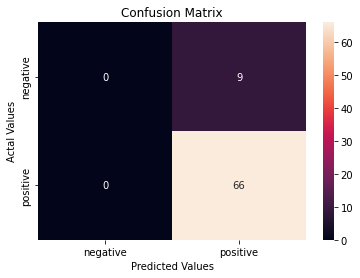

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predicted)
cm_df = pd.DataFrame(cm,index = ['negative','positive'],
                     columns = ['negative','positive']
                     )

#Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
random_sample_florida_reviews_postcovid=florida_reviews_postcovid.sample(300)
random_sample_florida_reviews_postcovid

,rating,written_date,review_text,branch,label
235,5,"January 6, 2021",The house band at the HR is awesome! Abby Road...,Universal Studios Florida,1.0
146,1,"March 20, 2021",I went during March Spring break. The tickets ...,Universal Studios Florida,0.0
65,1,"April 22, 2021",1. Website showed limited capacity yet people ...,Universal Studios Florida,0.0
248,4,"January 2, 2021",This place so awesome. I recommend getting the...,Universal Studios Florida,1.0
280,1,"December 21, 2020","If I could give zero stars, I would. We planne...",Universal Studios Florida,0.0
...,...,...,...,...,...
108,1,"April 3, 2021",The workers were rude and spent the entire day...,Universal Studios Florida,0.0
365,5,"October 3, 2020",We actually went in Aug-2019 during summer bre...,Universal Studios Florida,1.0
499,5,"May 5, 2020","For anyone 7 years + thus is a great park, maj...",Universal Studios Florida,1.0
121,5,"March 30, 2021",I have always loved Universal Orlando and this...,Universal Studios Florida,1.0


In [ ]:
#split the model into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(random_sample_florida_reviews_postcovid['review_text'],
                                                    random_sample_florida_reviews_postcovid['label'],
                                                    random_state=0,
                                                    test_size=0.25 #assign 25% to a test set.
                                                    )

print('Number of rows in the total set: {}'.format(random_sample_florida_reviews_postcovid.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

print (1250/5000)

Number of rows in the total set: 300
Number of rows in the training set: 225
Number of rows in the test set: 75
0.25


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#generate CountVectorizer object.
tfidf_vector = TfidfVectorizer(
lowercase=True,
stop_words='english',
ngram_range=(1, 2),             #The lower and upper boundary of the range of n-values for different n-grams to be extracted.
max_df=0.3,                     #used for removing terms that appear too frequently
min_df=0.05                      #used for removing terms that appear too infrequently.
)

In [ ]:
# Fit the training data and then return the matrix
training_data = tfidf_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = tfidf_vector.transform(X_test)


print ("Shape of training set",training_data.shape)

print ("Shape of testing set",testing_data.shape)

Shape of training set (225, 232)
Shape of testing set (75, 232)


In [ ]:
vocab_dict=tfidf_vector.vocabulary_
print ("Unique Vocabulary: ",vocab_dict)
print (len(vocab_dict))

Unique Vocabulary:  {'went': 226, 'week': 225, 'money': 133, 'did': 49, 'pretty': 157, 'lines': 116, 'employees': 60, 'rude': 167, 'mask': 128, 'old': 140, 'having': 100, 'group': 93, 'husband': 106, 'doing': 56, 'said': 169, 'wasn': 219, 'waiting': 214, 'away': 18, 'tell': 186, 'couldn': 38, 'area': 12, 'really': 160, 'make': 126, 'overall': 146, 'limited': 115, 'wait': 211, 'best': 21, 'orlando': 144, 'nice': 138, 'closed': 34, 'big': 23, 'worth': 229, 'visit': 209, 'studios': 183, 'gone': 88, 'disney': 53, 'universal studios': 202, 'cost': 37, 'spent': 179, 'tickets': 193, 'parking': 150, 'times': 194, 'hours': 105, 'needed': 136, 'feet': 75, '30': 3, 'minutes': 132, 'daughter': 44, 'gave': 85, 'express': 67, 'pass': 152, 'food': 79, 'paid': 148, 'took': 196, 'got': 90, 'asked': 15, 'order': 143, 'customer': 42, 'experience': 66, 'years': 231, 'place': 154, 'express pass': 68, 'social': 176, 'distancing': 55, 'packed': 147, 'hard': 99, 'virtual': 207, 'queue': 159, 'early': 58, 'kno

In [ ]:
#import NB library
from sklearn.naive_bayes import MultinomialNB

#choose a model.
naive_bayes = MultinomialNB()

#fit your training set to the model.
naive_bayes.fit(training_data, y_train)

#predict the labels for testing set.
predicted = naive_bayes.predict(testing_data)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: ', format(accuracy_score(y_test, predicted)))
print('Precision score: ', format(precision_score(y_test, predicted)))
print('Recall score: ', format(recall_score(y_test, predicted)))
print('F1 score: ', format(f1_score(y_test, predicted)))

Accuracy score:  0.8533333333333334
Precision score:  0.8275862068965517
Recall score:  0.9795918367346939
F1 score:  0.897196261682243


In [ ]:
random_sample_singapore_reviews_precovid=singapore_reviews_precovid.sample(100)
random_sample_singapore_reviews_precovid

,rating,written_date,review_text,branch,label
38463,5,"January 13, 2018",You must shed your fixations about realty as s...,Universal Studios Singapore,1.0
38275,4,"March 4, 2018","Having been to California, Orlando and the sis...",Universal Studios Singapore,1.0
35412,4,"January 9, 2020",We were three generations of family. There’s ...,Universal Studios Singapore,1.0
37323,5,"September 16, 2018","Located at the entrance of Sentosa Island, bou...",Universal Studios Singapore,1.0
37137,4,"October 30, 2018",Awesome family day out with 15 & 10 year old. ...,Universal Studios Singapore,1.0
...,...,...,...,...,...
38255,5,"March 6, 2018",Brings back the child in you. amazing shows an...,Universal Studios Singapore,1.0
36078,4,"July 14, 2019",great day to visit. lines on rides can take 40...,Universal Studios Singapore,1.0
37572,4,"July 29, 2018","Beautifully clean attraction, as is the rest o...",Universal Studios Singapore,1.0
36339,5,"May 9, 2019",Universal Studio is very good design for kid a...,Universal Studios Singapore,1.0


In [ ]:
#split the model into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(random_sample_singapore_reviews_precovid['review_text'],
                                                    random_sample_singapore_reviews_precovid['label'],
                                                    random_state=0,
                                                    test_size=0.25 #assign 25% to a test set.
                                                    )

print('Number of rows in the total set: {}'.format(random_sample_singapore_reviews_precovid.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

print (1250/5000)

Number of rows in the total set: 100
Number of rows in the training set: 75
Number of rows in the test set: 25
0.25


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#generate CountVectorizer object.
tfidf_vector = TfidfVectorizer(
lowercase=True,
stop_words='english',
ngram_range=(1, 2),             #The lower and upper boundary of the range of n-values for different n-grams to be extracted.
max_df=0.3,                     #used for removing terms that appear too frequently
min_df=0.05                      #used for removing terms that appear too infrequently.
)

In [ ]:
# Fit the training data and then return the matrix
training_data = tfidf_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = tfidf_vector.transform(X_test)


print ("Shape of training set",training_data.shape)

print ("Shape of testing set",testing_data.shape)

Shape of training set (75, 174)
Shape of testing set (25, 174)


In [ ]:
vocab_dict=tfidf_vector.vocabulary_
print ("Unique Vocabulary: ",vocab_dict)
print (len(vocab_dict))

Unique Vocabulary:  {'visited': 157, 'universal': 149, 'studios': 136, 'amazing': 6, 'kids': 75, 'great': 58, 'good': 55, 'overall': 98, 'nice': 93, 'experience': 41, 'universal studios': 151, 'good rides': 56, 'loved': 83, 'unlimited': 152, 'express': 42, 'passes': 101, 'old': 94, 'fun': 51, 'think': 142, 'pass': 100, 'enjoyed': 37, 'water': 165, 'world': 171, 'getting': 53, 'jurassic': 72, 'way': 168, 'transformers': 147, 'line': 78, 'roller': 120, 'coaster': 26, 'day universal': 27, 'express passes': 44, 'water world': 166, 'jurassic park': 73, 'transformers ride': 148, 'roller coaster': 121, 'young': 173, 'tickets': 144, 'worth': 172, 'walk': 163, 'right': 119, 'want': 164, 'did': 30, 'heat': 61, 'singapore': 127, 'hot': 66, 'family': 45, 'rest': 116, 'pay': 102, 'friends': 50, 'children': 23, 'paying': 103, 'happy': 60, 'visit': 156, 'busy': 19, 'able': 2, 'use': 153, 'big': 17, 'attraction': 7, 'attractions': 8, 'away': 11, 'lines': 79, 'average': 10, 'mins': 85, 'close': 25, 've

In [ ]:
#import NB library
from sklearn.naive_bayes import MultinomialNB

#choose a model.
naive_bayes = MultinomialNB()

#fit your training set to the model.
naive_bayes.fit(training_data, y_train)

#predict the labels for testing set.
predicted = naive_bayes.predict(testing_data)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: ', format(accuracy_score(y_test, predicted)))
print('Precision score: ', format(precision_score(y_test, predicted)))
print('Recall score: ', format(recall_score(y_test, predicted)))
print('F1 score: ', format(f1_score(y_test, predicted)))

Accuracy score:  0.92
Precision score:  0.92
Recall score:  1.0
F1 score:  0.9583333333333334


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.92      1.00      0.96        23

    accuracy                           0.92        25
   macro avg       0.46      0.50      0.48        25
weighted avg       0.85      0.92      0.88        25



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


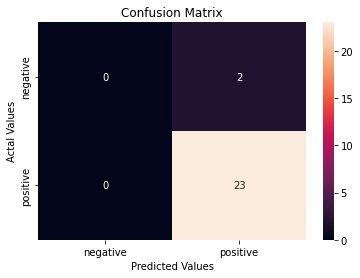

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predicted)
cm_df = pd.DataFrame(cm,index = ['negative','positive'],
                     columns = ['negative','positive']
                     )

#Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
random_sample_singapore_reviews_postcovid=singapore_reviews_postcovid.sample(100)
random_sample_singapore_reviews_postcovid

,rating,written_date,review_text,branch,label
35268,5,"March 14, 2020",Me and my family got a good time at there:) We...,Universal Studios Singapore,1.0
35220,1,"July 30, 2020",Stopped here during our visit to Singapore. It...,Universal Studios Singapore,0.0
35232,4,"June 21, 2020",Cannot forget this... one should not miss it ...,Universal Studios Singapore,1.0
35234,5,"June 13, 2020",This place looked like little Hollywood when w...,Universal Studios Singapore,1.0
35183,1,"December 21, 2020","It was supposed to be a place of fun. However,...",Universal Studios Singapore,0.0
...,...,...,...,...,...
35223,1,"July 23, 2020",Because some our friends went the very first d...,Universal Studios Singapore,0.0
35193,4,"November 28, 2020",The kids always have a good time in USS. There...,Universal Studios Singapore,1.0
35207,4,"September 6, 2020","I love Universal Singapore, I have a season pa...",Universal Studios Singapore,1.0
35209,5,"September 4, 2020","In any Universal Studio, fun and thrills are t...",Universal Studios Singapore,1.0


In [ ]:
#split the model into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(random_sample_singapore_reviews_postcovid['review_text'],
                                                    random_sample_singapore_reviews_postcovid['label'],
                                                    random_state=0,
                                                    test_size=0.25 #assign 25% to a test set.
                                                    )

print('Number of rows in the total set: {}'.format(random_sample_singapore_reviews_postcovid.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

print (1250/5000)

Number of rows in the total set: 100
Number of rows in the training set: 75
Number of rows in the test set: 25
0.25


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#generate CountVectorizer object.
tfidf_vector = TfidfVectorizer(
lowercase=True,
stop_words='english',
ngram_range=(1, 2),             #The lower and upper boundary of the range of n-values for different n-grams to be extracted.
max_df=0.3,                     #used for removing terms that appear too frequently
min_df=0.05                      #used for removing terms that appear too infrequently.
)

In [ ]:
# Fit the training data and then return the matrix
training_data = tfidf_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = tfidf_vector.transform(X_test)


print ("Shape of training set",training_data.shape)

print ("Shape of testing set",testing_data.shape)

Shape of training set (75, 172)
Shape of testing set (25, 172)


In [ ]:
vocab_dict=tfidf_vector.vocabulary_
print ("Unique Vocabulary: ",vocab_dict)
print (len(vocab_dict))

Unique Vocabulary:  {'tickets': 140, 'bit': 16, 'expensive': 47, 'worth': 169, 'good': 57, 'kids': 72, 'adults': 4, 'enjoy': 44, 'roller': 111, 'lot': 78, 'walking': 162, 'water': 164, 'think': 139, 'staff': 125, 'visit': 154, 'did': 35, 'queue': 104, 'people': 102, 'visitors': 158, 'didn': 36, 'don': 38, 'food': 52, 'pass': 100, 'went': 166, 'studios': 130, 'covid': 27, '19': 1, 'pandemic': 98, 'management': 85, 'safe': 112, 'social': 120, 'distancing': 37, 'queues': 105, 'singapore': 118, 'waiting': 160, 'times': 142, 'long': 77, 'universal studios': 150, 'covid 19': 28, 'social distancing': 121, 'studios singapore': 131, 'family': 51, 'experience': 48, 'easy': 40, 'studio': 129, 'universal studio': 149, 'line': 75, 'like': 74, '10': 0, 'year': 170, 'jurassic': 69, 'terrible': 134, 'totally': 143, 'theme': 135, 'trip': 147, 'jurassic park': 70, 'theme park': 136, 'restaurants': 110, 'closed': 22, 'inside': 67, 'really': 108, 'just': 71, 'extremely': 50, 'overpriced': 97, 'make': 83, 

In [ ]:
#import NB library
from sklearn.naive_bayes import MultinomialNB

#choose a model.
naive_bayes = MultinomialNB()

#fit your training set to the model.
naive_bayes.fit(training_data, y_train)

#predict the labels for testing set.
predicted = naive_bayes.predict(testing_data)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: ', format(accuracy_score(y_test, predicted)))
print('Precision score: ', format(precision_score(y_test, predicted)))
print('Recall score: ', format(recall_score(y_test, predicted)))
print('F1 score: ', format(f1_score(y_test, predicted)))

Accuracy score:  0.72
Precision score:  0.7083333333333334
Recall score:  1.0
F1 score:  0.8292682926829268


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       1.00      0.12      0.22         8
         1.0       0.71      1.00      0.83        17

    accuracy                           0.72        25
   macro avg       0.85      0.56      0.53        25
weighted avg       0.80      0.72      0.64        25



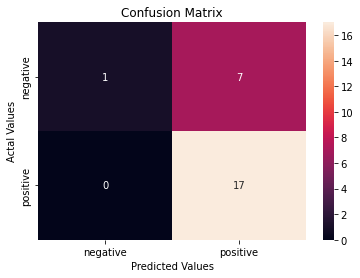

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predicted)
cm_df = pd.DataFrame(cm,index = ['negative','positive'],
                     columns = ['negative','positive']
                     )

#Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
random_sample_japan_reviews_precovid=japan_reviews_precovid.sample(100)
random_sample_japan_reviews_precovid

,rating,written_date,review_text,branch,label
30906,5,"July 17, 2019",I have been wanting to go to a Harry Potter wo...,Universal Studios Japan,1.0
31225,4,"November 25, 2018",This amusement park is full of amazing experie...,Universal Studios Japan,1.0
30828,5,"October 6, 2019",OMG so worth it purchased tickets through Kloo...,Universal Studios Japan,1.0
31035,5,"April 17, 2019","It was an amazing day out, one of the best day...",Universal Studios Japan,1.0
31141,5,"January 10, 2019",Went on 29 Dec [ Saturday] - one of the most p...,Universal Studios Japan,1.0
...,...,...,...,...,...
30935,5,"June 23, 2019",Weather was good and was not that crowded on a...,Universal Studios Japan,1.0
31485,5,"May 31, 2018",I went to Universal Studios Japan with my pare...,Universal Studios Japan,1.0
31385,4,"July 23, 2018",Great place for whole family to spend a day or...,Universal Studios Japan,1.0
30690,5,"January 6, 2020",A cool place to take a vacation especially if ...,Universal Studios Japan,1.0


In [ ]:
#split the model into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(random_sample_japan_reviews_precovid['review_text'],
                                                    random_sample_japan_reviews_precovid['label'],
                                                    random_state=0,
                                                    test_size=0.25 #assign 25% to a test set.
                                                    )

print('Number of rows in the total set: {}'.format(random_sample_japan_reviews_precovid.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

print (1250/5000)

Number of rows in the total set: 100
Number of rows in the training set: 75
Number of rows in the test set: 25
0.25


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#generate CountVectorizer object.
tfidf_vector = TfidfVectorizer(
lowercase=True,
stop_words='english',
ngram_range=(1, 2),             #The lower and upper boundary of the range of n-values for different n-grams to be extracted.
max_df=0.3,                     #used for removing terms that appear too frequently
min_df=0.05                      #used for removing terms that appear too infrequently.
)

In [ ]:
# Fit the training data and then return the matrix
training_data = tfidf_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = tfidf_vector.transform(X_test)


print ("Shape of training set",training_data.shape)

print ("Shape of testing set",testing_data.shape)

Shape of training set (75, 237)
Shape of testing set (25, 237)


In [ ]:
vocab_dict=tfidf_vector.vocabulary_
print ("Unique Vocabulary: ",vocab_dict)
print (len(vocab_dict))

Unique Vocabulary:  {'usj': 214, 'suggest': 190, 'getting': 78, 'opening': 139, 'gets': 77, 'busy': 21, 'section': 173, 'especially': 55, 'hour': 93, 'afternoon': 5, 'walking': 223, 'definitely': 38, 'recommend': 163, 'going': 79, 'great': 82, 'fun': 76, 'family': 62, 'lot': 114, 'food': 72, 'choose': 29, 'quite': 161, 'restaurants': 167, 'opening time': 140, 'recommend going': 164, 'amazing': 6, 'highlight': 87, 'just': 102, 'worth': 236, 'visit': 216, 'arrived': 8, 'early': 50, 'able': 3, '30': 0, 'mins': 126, 'rest': 165, 'queues': 159, 'main': 119, 'really': 162, 'long': 112, '40': 1, 'waited': 219, 'hours': 94, 'hollywood': 91, 'expensive': 57, 'queuing': 160, 'available': 11, 'children': 28, 'popular': 151, 'queue': 158, 'times': 204, 'spend': 181, 'money': 129, 'attractions': 10, 'think': 199, 'avoid': 13, 'loved': 116, 'waited hours': 220, 'express pass': 59, 'popular rides': 152, 'spent': 182, 'studios': 188, 'fan': 63, 'place': 149, 'felt': 68, 'hogwarts': 89, 'try': 208, 'bu

In [ ]:
#import NB library
from sklearn.naive_bayes import MultinomialNB

#choose a model.
naive_bayes = MultinomialNB()

#fit your training set to the model.
naive_bayes.fit(training_data, y_train)

#predict the labels for testing set.
predicted = naive_bayes.predict(testing_data)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: ', format(accuracy_score(y_test, predicted)))
print('Precision score: ', format(precision_score(y_test, predicted)))
print('Recall score: ', format(recall_score(y_test, predicted)))
print('F1 score: ', format(f1_score(y_test, predicted)))

Accuracy score:  0.96
Precision score:  0.96
Recall score:  1.0
F1 score:  0.9795918367346939


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.96      1.00      0.98        24

    accuracy                           0.96        25
   macro avg       0.48      0.50      0.49        25
weighted avg       0.92      0.96      0.94        25



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


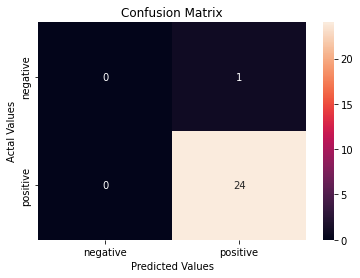

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predicted)
cm_df = pd.DataFrame(cm,index = ['negative','positive'],
                     columns = ['negative','positive']
                     )

#Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt=".0f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
random_sample_japan_reviews_postcovid=japan_reviews_postcovid.sample(20)
random_sample_japan_reviews_postcovid

,rating,written_date,review_text,branch,label
30622,1,"April 5, 2021",too expensive and nothing special。i had to thr...,Universal Studios Japan,0.0
30633,4,"June 26, 2020","A great day out, lots of unique things you nev...",Universal Studios Japan,1.0
30629,4,"October 22, 2020",I liked it here because of the sun at lost her...,Universal Studios Japan,1.0
30628,5,"October 24, 2020",The experience was the best we have had at an ...,Universal Studios Japan,1.0
30627,4,"November 1, 2020",This was for my sons 10th birthday and my wife...,Universal Studios Japan,1.0
30623,5,"February 21, 2021",Love USJ! There's something they do different ...,Universal Studios Japan,1.0
30635,5,"May 28, 2020","There are various zones such as Harry Poter, M...",Universal Studios Japan,1.0
30630,5,"October 5, 2020",All i have felt was great. Fantastic. So happy...,Universal Studios Japan,1.0
30636,5,"May 6, 2020",I went there in the late Morning and i spent t...,Universal Studios Japan,1.0
30638,5,"March 19, 2020",I've been to USJ three time with my family alr...,Universal Studios Japan,1.0


In [ ]:
#split the model into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(random_sample_japan_reviews_postcovid['review_text'],
                                                    random_sample_japan_reviews_postcovid['label'],
                                                    random_state=0,
                                                    test_size=0.25 #assign 25% to a test set.
                                                    )

print('Number of rows in the total set: {}'.format(random_sample_japan_reviews_postcovid.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

print (1250/5000)

Number of rows in the total set: 20
Number of rows in the training set: 15
Number of rows in the test set: 5
0.25


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#generate CountVectorizer object.
tfidf_vector = TfidfVectorizer(
lowercase=True,
stop_words='english',
ngram_range=(1, 2),             #The lower and upper boundary of the range of n-values for different n-grams to be extracted.
max_df=0.3,                     #used for removing terms that appear too frequently
min_df=0.05                      #used for removing terms that appear too infrequently.
)

In [ ]:
# Fit the training data and then return the matrix
training_data = tfidf_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = tfidf_vector.transform(X_test)


print ("Shape of training set",training_data.shape)

print ("Shape of testing set",testing_data.shape)

Shape of training set (15, 888)
Shape of testing set (5, 888)


In [ ]:
vocab_dict=tfidf_vector.vocabulary_
print ("Unique Vocabulary: ",vocab_dict)
print (len(vocab_dict))

Unique Vocabulary:  {'osaka': 532, 'trip': 794, 'complete': 145, 'coming': 141, 'amazing': 42, 'place': 575, 'game': 313, 'movie': 509, 'environment': 232, 'just': 410, 'like': 432, 'osaka trip': 536, 'trip complete': 795, 'complete coming': 147, 'coming amazing': 142, 'amazing place': 44, 'place great': 577, 'great rides': 334, 'rides great': 672, 'great game': 331, 'game movie': 314, 'movie environment': 510, 'environment just': 233, 'just like': 412, 'like movie': 434, 'various': 820, 'zones': 878, 'poter': 584, 'minion': 499, 'spider': 722, 'man': 483, 'jaws': 396, 'jurassic': 407, 'available': 79, 'age': 36, 'groups': 336, 'interesting': 378, 'flying': 287, 'dinosaur': 192, 'waiting': 839, 'line': 437, 'really': 627, 'long': 459, 'sad': 690, 'buy': 116, 'express': 252, 'pass': 559, 'don': 208, 'expensive': 240, 'wait': 834, 'recommend': 632, 'person': 571, 'party': 557, 'popular': 582, 'attractions': 70, 'wanted': 848, 'universal': 806, 'studios': 733, 'various zones': 822, 'zones

In [ ]:
#import NB library
from sklearn.naive_bayes import MultinomialNB

#choose a model.
naive_bayes = MultinomialNB()

#fit your training set to the model.
naive_bayes.fit(training_data, y_train)

#predict the labels for testing set.
predicted = naive_bayes.predict(testing_data)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: ', format(accuracy_score(y_test, predicted)))
print('Precision score: ', format(precision_score(y_test, predicted)))
print('Recall score: ', format(recall_score(y_test, predicted)))
print('F1 score: ', format(f1_score(y_test, predicted)))

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0
